In [1]:
import torch
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.zeros(3, 3, 3, 3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [4]:
torch.rand(1, 3)

tensor([[0.0777, 0.4741, 0.8263]])

In [5]:
t = torch.rand(3, 5, 3)
t, torch.transpose(t, 2, 1)

(tensor([[[0.0544, 0.8213, 0.1524],
          [0.1668, 0.5290, 0.3649],
          [0.5178, 0.4983, 0.3655],
          [0.6250, 0.4314, 0.6669],
          [0.4136, 0.1728, 0.3745]],
 
         [[0.9680, 0.6797, 0.9810],
          [0.2551, 0.3794, 0.5225],
          [0.8965, 0.9711, 0.8196],
          [0.4656, 0.7031, 0.9472],
          [0.4715, 0.1316, 0.0066]],
 
         [[0.4213, 0.1650, 0.9714],
          [0.4447, 0.5707, 0.6914],
          [0.5828, 0.9705, 0.8836],
          [0.7640, 0.6334, 0.5154],
          [0.1921, 0.4452, 0.3911]]]),
 tensor([[[0.0544, 0.1668, 0.5178, 0.6250, 0.4136],
          [0.8213, 0.5290, 0.4983, 0.4314, 0.1728],
          [0.1524, 0.3649, 0.3655, 0.6669, 0.3745]],
 
         [[0.9680, 0.2551, 0.8965, 0.4656, 0.4715],
          [0.6797, 0.3794, 0.9711, 0.7031, 0.1316],
          [0.9810, 0.5225, 0.8196, 0.9472, 0.0066]],
 
         [[0.4213, 0.4447, 0.5828, 0.7640, 0.1921],
          [0.1650, 0.5707, 0.9705, 0.6334, 0.4452],
          [0.9714, 0.6914, 0.

In [6]:
t, torch.transpose(t, 1, 2)

(tensor([[[0.0544, 0.8213, 0.1524],
          [0.1668, 0.5290, 0.3649],
          [0.5178, 0.4983, 0.3655],
          [0.6250, 0.4314, 0.6669],
          [0.4136, 0.1728, 0.3745]],
 
         [[0.9680, 0.6797, 0.9810],
          [0.2551, 0.3794, 0.5225],
          [0.8965, 0.9711, 0.8196],
          [0.4656, 0.7031, 0.9472],
          [0.4715, 0.1316, 0.0066]],
 
         [[0.4213, 0.1650, 0.9714],
          [0.4447, 0.5707, 0.6914],
          [0.5828, 0.9705, 0.8836],
          [0.7640, 0.6334, 0.5154],
          [0.1921, 0.4452, 0.3911]]]),
 tensor([[[0.0544, 0.1668, 0.5178, 0.6250, 0.4136],
          [0.8213, 0.5290, 0.4983, 0.4314, 0.1728],
          [0.1524, 0.3649, 0.3655, 0.6669, 0.3745]],
 
         [[0.9680, 0.2551, 0.8965, 0.4656, 0.4715],
          [0.6797, 0.3794, 0.9711, 0.7031, 0.1316],
          [0.9810, 0.5225, 0.8196, 0.9472, 0.0066]],
 
         [[0.4213, 0.4447, 0.5828, 0.7640, 0.1921],
          [0.1650, 0.5707, 0.9705, 0.6334, 0.4452],
          [0.9714, 0.6914, 0.

In [7]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

In [8]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [9]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [10]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [11]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 25.7270
Epoch 10 Loss 1.9798
Epoch 20 Loss 18.7799
Epoch 30 Loss 8.9676
Epoch 40 Loss 0.0157
Epoch 50 Loss 0.1774
Epoch 60 Loss 0.1881
Epoch 70 Loss 0.4084
Epoch 80 Loss 0.0037
Epoch 90 Loss 0.8911
Epoch 100 Loss 1.1151
Epoch 110 Loss 0.6867
Epoch 120 Loss 0.1754
Epoch 130 Loss 0.1374
Epoch 140 Loss 0.0362
Epoch 150 Loss 1.2501
Epoch 160 Loss 0.3642
Epoch 170 Loss 0.1724
Epoch 180 Loss 0.0041
Epoch 190 Loss 0.1054


In [12]:
print(f'Final Params: {weight.item():.4f}x + {bias.item():.4f}')

Final Params: 2.6666x + 4.8826


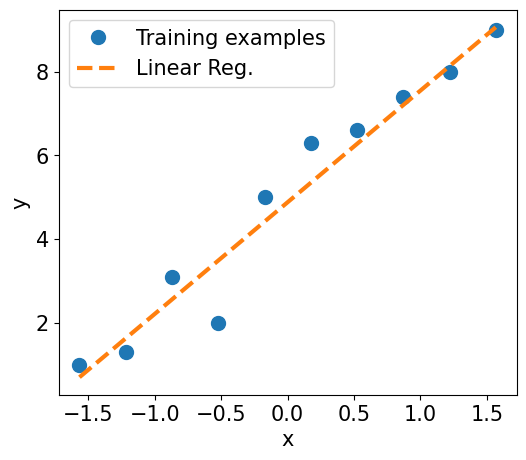

In [13]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [14]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 0.2482
Epoch 10 Loss 31.1976
Epoch 20 Loss 4.2229
Epoch 30 Loss 8.6418
Epoch 40 Loss 17.3847
Epoch 50 Loss 1.8155
Epoch 60 Loss 5.5895
Epoch 70 Loss 0.5266
Epoch 80 Loss 0.7693
Epoch 90 Loss 1.0023
Epoch 100 Loss 1.2136
Epoch 110 Loss 0.8368
Epoch 120 Loss 1.5721
Epoch 130 Loss 0.0773
Epoch 140 Loss 1.4235
Epoch 150 Loss 0.0808
Epoch 160 Loss 0.1032
Epoch 170 Loss 0.1884
Epoch 180 Loss 2.1565
Epoch 190 Loss 0.2909


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)


In [17]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return X

In [19]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [20]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# num_epochs = 100
# loss_hist = [0] * num_epochs
# accuracy_hist = [0] * num_epochs
# for epoch in range(num_epochs):
#     for x_batch, y_batch in train_dl:
#         pred = model(x_batch)
#         loss = loss_fn(pred, y_batch.long())
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         loss_hist[epoch] += loss.item()*y_batch.size(0)
#         is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#         accuracy_hist[epoch] += is_correct.mean()
#     loss_hist[epoch] /= len(train_dl.dataset)
#     accuracy_hist[epoch] /= len(train_dl.dataset)

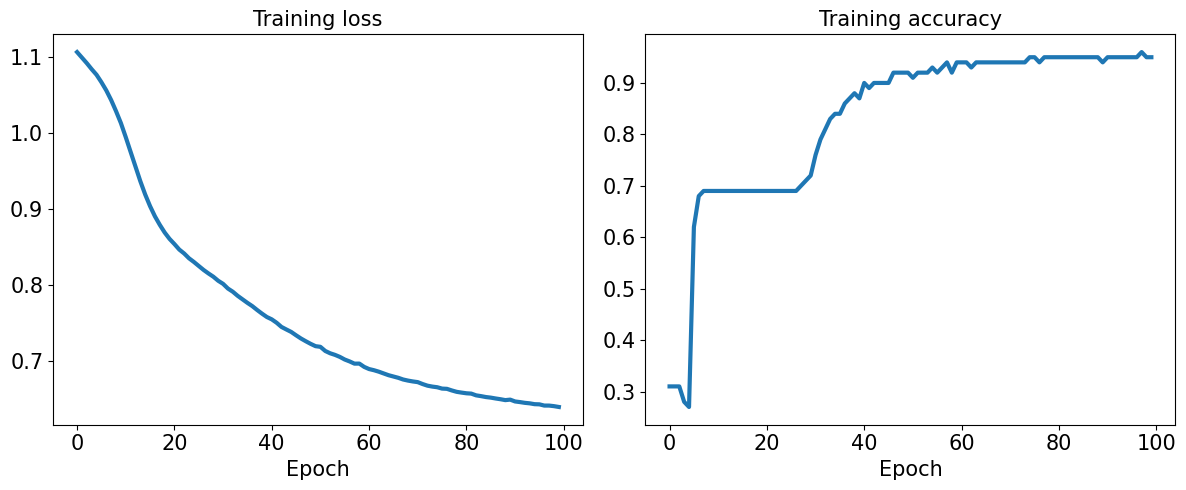

In [22]:

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)





X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)




class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)




num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)




fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()


In [23]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [24]:
import sys
import os
import pycuber as pc
from pycuber.solver import CFOPSolver

c = pc.Cube()
alg = pc.Formula()
random_alg = alg.random()
print(random_alg)
c(random_alg)
print(c)

solver = CFOPSolver(c)

solution = solver.solve(suppress_progress_messages=True)

print(solution)

F U L' B' R2 U L2 D2 R' U B L2 F U2 R D L F R' D2 B' L2 D2 B' U
         [g][y][r]
         [w][y][w]
         [y][y][o]
[y][g][o][b][b][g][w][o][w][g][o][o]
[g][r][y][r][g][y][g][o][w][r][b][o]
[w][o][g][r][r][r][b][w][b][r][r][b]
         [y][g][y]
         [b][w][b]
         [o][b][w]

B' R' U' D B' R' F2 L U' L' R U2 R' U R' U' R U L U' L' U2 L U' L' U2 F U F' U L' U2 L U' F U F2 U' F' L F U F U' L' U R' U2 R U2 R' F R U R' U' R' F' R2 U'


In [25]:
print(c)

         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



In [26]:
print([str(x) for x in np.array(c.get_face('F')).flatten()])

['[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]', '[g]']


In [27]:
pc.Square('green')

In [28]:
pc.Cubie(U=pc.Square('yellow'))

Cubie(U: [y])